In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
data = np.loadtxt("esb_process_tomography_20230108_1.txt")

In [3]:
data

array([[0.00000000e+00, 1.54900000e+03, 1.67323465e+09, ...,
        1.00471269e-04, 2.04313517e-04, 1.32918780e-04],
       [0.00000000e+00, 1.54900000e+03, 1.67323465e+09, ...,
        9.50839967e-05, 2.16972097e-04, 1.31051944e-04],
       [0.00000000e+00, 1.54900000e+03, 1.67323465e+09, ...,
        9.64840656e-05, 2.29926722e-04, 1.30233399e-04],
       ...,
       [1.00000000e+00, 1.55000000e+03, 1.67327864e+09, ...,
        1.10451998e-04, 3.60443984e-04, 2.94699021e-05],
       [1.00000000e+00, 1.55000000e+03, 1.67327864e+09, ...,
        1.13787049e-04, 3.40541766e-04, 2.97369497e-05],
       [1.00000000e+00, 1.55000000e+03, 1.67327864e+09, ...,
        1.11759669e-04, 3.55802535e-04, 2.86960312e-05]])

In [4]:
time_h_1549 = []
time_h_1549_2 = []
time_h_1549_4 = []
time_h_1549_6 = []
time_h_1549_8 = []
time_h_1550 = []
time_d_1549 = []
time_d_1549_2 = []
time_d_1549_4 = []
time_d_1549_6 = []
time_d_1549_8 = []
time_d_1550 = []

In [5]:
vh_h_1549 = []
vh_h_1549_2 = []
vh_h_1549_4 = []
vh_h_1549_6 = []
vh_h_1549_8 = []
vh_h_1550 = []
vh_d_1549 = []
vh_d_1549_2 = []
vh_d_1549_4 = []
vh_d_1549_6 = []
vh_d_1549_8 = []
vh_d_1550 = []

In [6]:
da_h_1549 = []
da_h_1549_2 = []
da_h_1549_4 = []
da_h_1549_6 = []
da_h_1549_8 = []
da_h_1550 = []
da_d_1549 = []
da_d_1549_2 = []
da_d_1549_4 = []
da_d_1549_6 = []
da_d_1549_8 = []
da_d_1550 = []

In [7]:
pd_h_1549 = []
pd_h_1549_2 = []
pd_h_1549_4 = []
pd_h_1549_6 = []
pd_h_1549_8 = []
pd_h_1550 = []
pd_d_1549 = []
pd_d_1549_2 = []
pd_d_1549_4 = []
pd_d_1549_6 = []
pd_d_1549_8 = []
pd_d_1550 = []

In [8]:
pa_h_1549 = []
pa_h_1549_2 = []
pa_h_1549_4 = []
pa_h_1549_6 = []
pa_h_1549_8 = []
pa_h_1550 = []
pa_d_1549 = []
pa_d_1549_2 = []
pa_d_1549_4 = []
pa_d_1549_6 = []
pa_d_1549_8 = []
pa_d_1550 = []

In [9]:
def extract_data(lh,ld,lt,la,ldp,d):
    vh = d[4]/(13.47*d[3]/9)
    pd = d[5]/(d[6]+d[5])
    pa = d[6]/(d[6]+d[5])
    lt.append(datetime.datetime.fromtimestamp(d[2]))
    lh.append(vh)
    ld.append((pd-pa)/(np.sin(2*np.arctan(vh))))
    ldp.append(pd)
    la.append(pa)

In [10]:
for i,d in enumerate(data):
    if d[0] == 0:
        if d[1] == 1549:
            extract_data(vh_h_1549,da_h_1549,time_h_1549,pa_h_1549,pd_h_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_h_1549_2,da_h_1549_2,time_h_1549_2,pa_h_1549_2,pd_h_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_h_1549_4,da_h_1549_4,time_h_1549_4,pa_h_1549_4,pd_h_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_h_1549_6,da_h_1549_6,time_h_1549_6,pa_h_1549_6,pd_h_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_h_1549_8,da_h_1549_8,time_h_1549_8,pa_h_1549_8,pd_h_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_h_1550,da_h_1550,time_h_1550,pa_h_1550,pd_h_1550,d)
    if d[0] == 1:
        if d[1] == 1549:
            extract_data(vh_d_1549,da_d_1549,time_d_1549,pa_d_1549,pd_d_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_d_1549_2,da_d_1549_2,time_d_1549_2,pa_d_1549_2,pd_d_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_d_1549_4,da_d_1549_4,time_d_1549_4,pa_d_1549_4,pd_d_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_d_1549_6,da_d_1549_6,time_d_1549_6,pa_d_1549_6,pd_d_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_d_1549_8,da_d_1549_8,time_d_1549_8,pa_d_1549_8,pd_d_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_d_1550,da_d_1550,time_d_1550,pa_d_1550,pd_d_1550,d)

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

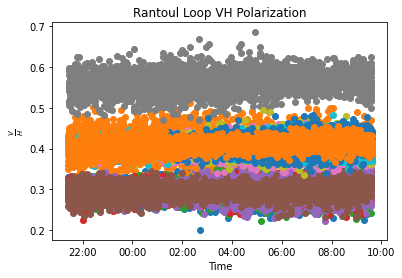

In [11]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_h_1549,vh_h_1549,label='H 1549',ls='',marker='o')
ax.plot(time_h_1549_2,vh_h_1549_2,label='H 1549.5',ls='',marker='o')
ax.plot(time_h_1549_4,vh_h_1549_4,label='H 1549.9',ls='',marker='o')
ax.plot(time_h_1549_6,vh_h_1549_6,label='H 1549.99',ls='',marker='o')
ax.plot(time_h_1549_8,vh_h_1549_8,label='H 1549.999',ls='',marker='o')
ax.plot(time_h_1550,vh_h_1550,label='H 1550',ls='',marker='o')
ax.plot(time_d_1549,vh_d_1549,label='D 1549',ls='',marker='o')
ax.plot(time_d_1549_2,vh_d_1549_2,label='D 1549.5',ls='',marker='o')
ax.plot(time_d_1549_4,vh_d_1549_4,label='D 1549.9',ls='',marker='o')
ax.plot(time_d_1549_6,vh_d_1549_6,label='D 1549.99',ls='',marker='o')
ax.plot(time_d_1549_8,vh_d_1549_8,label='D 1549.999',ls='',marker='o')
ax.plot(time_d_1550,vh_d_1550,label='D 1550',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
#ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

In [12]:
avg_vh_h_1549 = np.mean(np.array(vh_h_1549[:-13]).reshape(-1, 16), axis=1)
avg_vh_h_1549_2 = np.mean(np.array(vh_h_1549_2[:-10]).reshape(-1, 16), axis=1)
avg_vh_h_1549_4 = np.mean(np.array(vh_h_1549_4[:-2]).reshape(-1, 16), axis=1)
avg_vh_h_1549_6 = np.mean(np.array(vh_h_1549_6[:-8]).reshape(-1, 16), axis=1)
avg_vh_h_1549_8 = np.mean(np.array(vh_h_1549_8[:-12]).reshape(-1, 16), axis=1)
avg_vh_h_1550 = np.mean(np.array(vh_h_1550[:-12]).reshape(-1, 16), axis=1)
avg_vh_d_1549 = np.mean(np.array(vh_d_1549[:-8]).reshape(-1, 16), axis=1)
avg_vh_d_1549_2 = np.mean(np.array(vh_d_1549_2[:-11]).reshape(-1, 16), axis=1)
avg_vh_d_1549_4 = np.mean(np.array(vh_d_1549_4[:-7]).reshape(-1, 16), axis=1)
avg_vh_d_1549_6 = np.mean(np.array(vh_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_vh_d_1549_8 = np.mean(np.array(vh_d_1549_8[:-15]).reshape(-1, 16), axis=1)
avg_vh_d_1550 = np.mean(np.array(vh_d_1550[:-8]).reshape(-1, 16), axis=1)

In [13]:
avg_da_h_1549 = np.mean(np.array(da_h_1549[:-13]).reshape(-1, 16), axis=1)
avg_da_h_1549_2 = np.mean(np.array(da_h_1549_2[:-10]).reshape(-1, 16), axis=1)
avg_da_h_1549_4 = np.mean(np.array(da_h_1549_4[:-2]).reshape(-1, 16), axis=1)
avg_da_h_1549_6 = np.mean(np.array(da_h_1549_6[:-8]).reshape(-1, 16), axis=1)
avg_da_h_1549_8 = np.mean(np.array(da_h_1549_8[:-12]).reshape(-1, 16), axis=1)
avg_da_h_1550 = np.mean(np.array(da_h_1550[:-12]).reshape(-1, 16), axis=1)
avg_da_d_1549 = np.mean(np.array(da_d_1549[:-8]).reshape(-1, 16), axis=1)
avg_da_d_1549_2 = np.mean(np.array(da_d_1549_2[:-11]).reshape(-1, 16), axis=1)
avg_da_d_1549_4 = np.mean(np.array(da_d_1549_4[:-7]).reshape(-1, 16), axis=1)
avg_da_d_1549_6 = np.mean(np.array(da_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_da_d_1549_8 = np.mean(np.array(da_d_1549_8[:-15]).reshape(-1, 16), axis=1)
avg_da_d_1550 = np.mean(np.array(da_d_1550[:-8]).reshape(-1, 16), axis=1)

In [14]:
avg_pa_h_1549 = np.mean(np.array(pa_h_1549[:-13]).reshape(-1, 16), axis=1)
avg_pa_h_1549_2 = np.mean(np.array(pa_h_1549_2[:-10]).reshape(-1, 16), axis=1)
avg_pa_h_1549_4 = np.mean(np.array(pa_h_1549_4[:-2]).reshape(-1, 16), axis=1)
avg_pa_h_1549_6 = np.mean(np.array(pa_h_1549_6[:-8]).reshape(-1, 16), axis=1)
avg_pa_h_1549_8 = np.mean(np.array(pa_h_1549_8[:-12]).reshape(-1, 16), axis=1)
avg_pa_h_1550 = np.mean(np.array(pa_h_1550[:-12]).reshape(-1, 16), axis=1)
avg_pa_d_1549 = np.mean(np.array(pa_d_1549[:-8]).reshape(-1, 16), axis=1)
avg_pa_d_1549_2 = np.mean(np.array(pa_d_1549_2[:-11]).reshape(-1, 16), axis=1)
avg_pa_d_1549_4 = np.mean(np.array(pa_d_1549_4[:-7]).reshape(-1, 16), axis=1)
avg_pa_d_1549_6 = np.mean(np.array(pa_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_pa_d_1549_8 = np.mean(np.array(pa_d_1549_8[:-15]).reshape(-1, 16), axis=1)
avg_pa_d_1550 = np.mean(np.array(pa_d_1550[:-8]).reshape(-1, 16), axis=1)

In [15]:
avg_pd_h_1549 = np.mean(np.array(pd_h_1549[:-13]).reshape(-1, 16), axis=1)
avg_pd_h_1549_2 = np.mean(np.array(pd_h_1549_2[:-10]).reshape(-1, 16), axis=1)
avg_pd_h_1549_4 = np.mean(np.array(pd_h_1549_4[:-2]).reshape(-1, 16), axis=1)
avg_pd_h_1549_6 = np.mean(np.array(pd_h_1549_6[:-8]).reshape(-1, 16), axis=1)
avg_pd_h_1549_8 = np.mean(np.array(pd_h_1549_8[:-12]).reshape(-1, 16), axis=1)
avg_pd_h_1550 = np.mean(np.array(pd_h_1550[:-12]).reshape(-1, 16), axis=1)
avg_pd_d_1549 = np.mean(np.array(pd_d_1549[:-8]).reshape(-1, 16), axis=1)
avg_pd_d_1549_2 = np.mean(np.array(pd_d_1549_2[:-11]).reshape(-1, 16), axis=1)
avg_pd_d_1549_4 = np.mean(np.array(pd_d_1549_4[:-7]).reshape(-1, 16), axis=1)
avg_pd_d_1549_6 = np.mean(np.array(pd_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_pd_d_1549_8 = np.mean(np.array(pd_d_1549_8[:-15]).reshape(-1, 16), axis=1)
avg_pd_d_1550 = np.mean(np.array(pd_d_1550[:-8]).reshape(-1, 16), axis=1)

In [16]:
theta_h_1549 = []
theta_h_1549_2 = []
theta_h_1549_4 = []
theta_h_1549_6 = []
theta_h_1549_8 = []
theta_h_1550 = []
theta_d_1549 = []
theta_d_1549_2 = []
theta_d_1549_4 = []
theta_d_1549_6 = []
theta_d_1549_8 = []
theta_d_1550 = []

In [17]:
phi_h_1549 = []
phi_h_1549_2 = []
phi_h_1549_4 = []
phi_h_1549_6 = []
phi_h_1549_8 = []
phi_h_1550 = []
phi_d_1549 = []
phi_d_1549_2 = []
phi_d_1549_4 = []
phi_d_1549_6 = []
phi_d_1549_8 = []
phi_d_1550 = []

In [18]:
def fmle(params,*args):
        phh,phv,phd,pha,pvh,pvv,pvd,pva,pdh,pdv,pdd,pda,pah,pav,pad,paa=args
        th,tv = params
        return -(np.log(th**2)*phh
                +np.log(1/2*(th**2))*phd
                 +np.log(1/2*(th**2))*pha
                 +np.log(tv**2)*pvv
                +np.log(1/2*(tv**2))*pvd
                 +np.log(1/2*(tv**2))*pva
                +np.log((1-th**2)*1/2)*pdh
                 +np.log((1-tv**2)*1/2)*pdv
                +np.log(1/2*((1-th**2)*1/2+(1-tv**2)*1/2+np.sqrt((1-th**2)*(1-tv**2))))*pdd
                +np.log((1-th**2)*1/2)*pah
                 +np.log((1-tv**2)*1/2)*pav
                 +np.log(1/2*((1-th**2)*1/2+(1-tv**2)*1/2+np.sqrt((1-th**2)*(1-tv**2))))*paa)
x0=[0.5,0.5]
bounds=((0.1,0.9),(0.1,0.9))
#x0=[1,1,1,1,1,1,1,1,0.5,0.5,0.5,0.5]
phh=0.6442961533
phv=0.00170332414
phd=0.2930019653
pha=0.370100087
pvh=0.008375770378
pvv=0.334275758
pvd=0.1883321921
pva=0.2254326596
pdh=0.2178159301
pdv=0.2789220039
pdd=0.4464868918
pda=0.03211896733
pah=0.1295121462
pav=0.3850989139
pad=0.07217895082
paa=0.4517584615
result = minimize(fmle, x0,bounds=((0.1,0.9),(0.1,0.9)),args=(phh,phv,phd,pha,pvh,pvv,pvd,pva,pdh,pdv,pdd,pda,pah,pav,pad,paa))
th=result.x[0]
tv=result.x[1]
print(th**2)
print(tv**2)
def fmlenew(params,*args):
        ph,pv,pd,pa=args
        theta,phi = params
        qh=th**2*np.cos(theta)**2
        qv=tv**2*np.sin(theta)**2
        qd=1/2*((1-th**2)*np.cos(theta)**2+(1-tv**2)*np.sin(theta)**2+np.sqrt((1-th**2)*(1-tv**2))*np.sin(2*theta)*np.cos(phi))
        qa=1/2*((1-th**2)*np.cos(theta)**2+(1-tv**2)*np.sin(theta)**2-np.sqrt((1-th**2)*(1-tv**2))*np.sin(2*theta)*np.cos(phi))
        return -(qh/(qh+qv))**ph*(qv/(qh+qv))**pv*(qd/(qa+qd))**pd*(qa/(qa+qd))**pa

0.6392730481193559
0.3896246965220901


In [19]:
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549[i]+1),1-1/(avg_vh_h_1549[i]+1),avg_pd_h_1549[i],avg_pa_h_1549[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549.append(result.x[0]*(180/(np.pi)))
    phi_h_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_2[i]+1),1-1/(avg_vh_h_1549_2[i]+1),avg_pd_h_1549_2[i],avg_pa_h_1549_2[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_4)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_4[i]+1),1-1/(avg_vh_h_1549_4[i]+1),avg_pd_h_1549_4[i],avg_pa_h_1549_4[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_6)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_6[i]+1),1-1/(avg_vh_h_1549_6[i]+1),avg_pd_h_1549_6[i],avg_pa_h_1549_6[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_8)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_8[i]+1),1-1/(avg_vh_h_1549_8[i]+1),avg_pd_h_1549_8[i],avg_pa_h_1549_8[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1550)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1550[i]+1),1-1/(avg_vh_h_1550[i]+1),avg_pd_h_1550[i],avg_pa_h_1550[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1550.append(result.x[0]*(180/(np.pi)))
    phi_h_1550.append(result.x[1]*(180/(np.pi)))

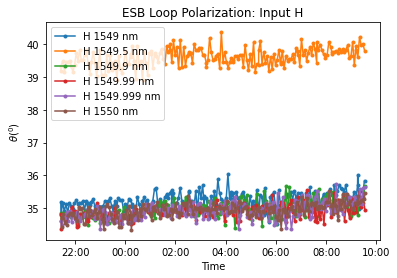

In [20]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],theta_h_1549,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],theta_h_1549_2,label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_h_1549_4,label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_h_1549_6,label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],theta_h_1549_8,label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],theta_h_1550,label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input H")
plt.legend(loc='upper left')
plt.savefig('vh_theta_drift_esb_20230108.pdf')

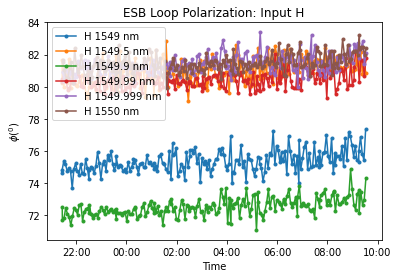

In [21]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],phi_h_1549,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],phi_h_1549_2,label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_h_1549_4,label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_h_1549_6,label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],phi_h_1549_8,label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],phi_h_1550,label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input H")
plt.legend(loc='upper left')
plt.savefig('vh_phi_drift_esb_20230108.pdf')

In [22]:
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549[i]+1),1-1/(avg_vh_d_1549[i]+1),avg_pd_d_1549[i],avg_pa_d_1549[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549.append(result.x[0]*(180/(np.pi)))
    phi_d_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_2[i]+1),1-1/(avg_vh_d_1549_2[i]+1),avg_pd_d_1549_2[i],avg_pa_d_1549_2[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_4)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_4[i]+1),1-1/(avg_vh_d_1549_4[i]+1),avg_pd_d_1549_4[i],avg_pa_d_1549_4[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_6)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_6[i]+1),1-1/(avg_vh_d_1549_6[i]+1),avg_pd_d_1549_6[i],avg_pa_d_1549_6[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_8)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_8[i]+1),1-1/(avg_vh_d_1549_8[i]+1),avg_pd_d_1549_8[i],avg_pa_d_1549_8[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1550)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1550[i]+1),1-1/(avg_vh_d_1550[i]+1),avg_pd_d_1550[i],avg_pa_d_1550[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1550.append(result.x[0]*(180/(np.pi)))
    phi_d_1550.append(result.x[1]*(180/(np.pi)))

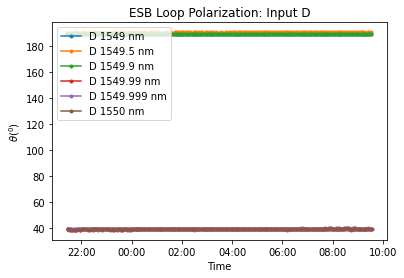

In [23]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],theta_d_1549,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],theta_d_1549_2,label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_d_1549_4,label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_d_1549_6,label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],theta_d_1549_8,label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],theta_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
#plt.ylim((38,40))
plt.title("ESB Loop Polarization: Input D")
plt.legend(loc='upper left')
plt.savefig('da_theta_drift_esb_20230108.pdf')

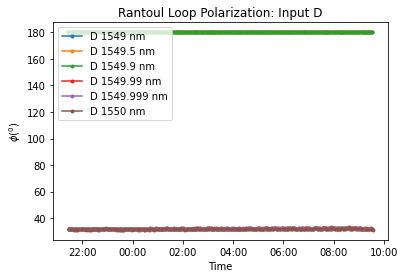

In [24]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],phi_d_1549,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],phi_d_1549_2,label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_d_1549_4,label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_d_1549_6,label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],phi_d_1549_8,label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],phi_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
#plt.ylim((31,34))
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input D")
plt.legend(loc='upper left')
plt.savefig('da_phi_drift_esb_20230108.pdf')

In [25]:
x=[0.5,0.5]
result = minimize(fmlenew, x0,args=(0,1,0,0))
print(result.x[0])
print(result.x[1])

1.570796471479137
1.0


In [26]:
np.degrees(7.09487416885278e-09)

4.065063460516521e-07

In [27]:
for i in range(len(avg_pd_d_1549)):
    print(avg_pd_d_1549[i],avg_pa_d_1549[i])

0.9186456809321795 0.08135431906782059
0.9162964076043336 0.08370359239566641
0.9174158362596776 0.08258416374032242
0.9170332058870101 0.0829667941129899
0.9166244230773255 0.0833755769226745
0.9166192689246102 0.08338073107538987
0.9168756864603389 0.08312431353966104
0.9166739539926769 0.083326046007323
0.918369750045998 0.08163024995400203
0.9178187455035876 0.08218125449641235
0.9190767289938737 0.0809232710061264
0.9184675143790619 0.08153248562093804
0.9166013843584464 0.0833986156415536
0.9174840600482459 0.08251593995175417
0.9194048695168798 0.08059513048312011
0.9178541025960965 0.08214589740390354
0.9173566582106158 0.08264334178938418
0.9179341442849476 0.08206585571505239
0.9176856877399624 0.0823143122600376
0.9180122193399662 0.08198778066003376
0.9178324610345706 0.08216753896542943
0.9178131290461559 0.08218687095384414
0.9167895862574394 0.08321041374256055
0.9172445767135218 0.08275542328647828
0.9169018087563521 0.083098191243648
0.9176116243348542 0.08238837566514

In [28]:
1/(avg_vh_d_1549[0]+1),1-1/(avg_vh_d_1549[0]+1)

(0.71632709708203, 0.28367290291797)

In [29]:
x=[0.5,0.5]
result = minimize(fmlenew, x0,args=(0.7391979220675289, 0.2608020779324711,0.9253954831184025, 0.07460451688159753))
print(result.x[0])
print(result.x[1])

0.6504049436141849
0.5532194918546641


In [30]:
np.degrees(0.6504049436141849)

37.265458243537076

In [31]:
np.degrees(0.5532194918546641)

31.69714202764428